In [44]:
%pylab 
from nugridpy import nugridse as mp
import matplotlib.pyplot as plt
data_dir="/data/nugrid_apod2/"    

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'f', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### plotting function

In [45]:
mp.set_nugrid_path('/data/nugrid_apod2')
sefiles=mp.se(mass=20,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 20.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


In [46]:
def plot_infall_vel(xaxis,ax, path_exp,path_wind,label,shape,marker,markevery,color):
        '''
        Plots the infall velocity vs free-fall time or mass coordinate

        Parameter
        xaxis: 'ff': free-fall time
                'mass' : mass coordinate
        

        '''

        plt.figure(fig)
#        import nugridse as mp
        sefiles=mp.se(path_exp)
        cyc = int(sefiles.se.cycles[0])
        cyc = cyc - 1
        sefiles=mp.se(path_wind)



        G =6.67259e-8 #cm^3 g^-1 s^-2 
        msun = 1.9891e33 #Msun in g

        r = sefiles.get(cyc,'radius') #cm
        rho = sefiles.get(cyc,'rho') #g/cm3
        m = sefiles.get(cyc,'mass')*msun # cm
        print('cycle lookup',cyc)
        r = np.array(r)

        t_ff = np.pi/2 * r**(3./2.)/np.sqrt(2*G*m) #s

        v_ff = np.sqrt(2*G*m/r)

        mdot = 4.*np.pi*r**2 * rho * v_ff /msun
        print('plot')
        if xaxis=='ff':
                ax.plot(t_ff,mdot,label=label,linestyle=shape,markevery=markevery,marker=marker,color=color)
                plt.xlabel(r't$_{ff}$ [s]')
                plt.xscale('log')

        if xaxis=='mass':
                ax.plot(m/msun,mdot,label=label,linestyle=shape,markevery=markevery,marker=marker,color=color)
                plt.xlabel("M [M$_{\odot}$]")

        plt.ylabel(r"$\dot{M}$ [M$_{\odot}$/s]")
        plt.yscale('log')

#### Input parameter, general

In [47]:
fign = 1
fig=fign
markevery=500
props = dict(boxstyle='square', facecolor='w', alpha=1)
metals=['Z=0.02','Z=0.01','Z=0.001','Z=0.0001']
marker=['o','^','s','D']
marker=['','','','']
shape=['-','--',':','-.']
color=['r','b','g','k']

##xaxis='ff'
#xmin=0.;xmax=2.
xaxis='mass'
xmin=0.;xmax=5.
ymin=1e-4;ymax=1e2
props=dict(boxstyle='square',facecolor='w',alpha=1)
path=data_dir+'/data/set1ext'
textr=0.25
log=True
fontsize=10

#### create figure

<IPython.core.display.Javascript object>


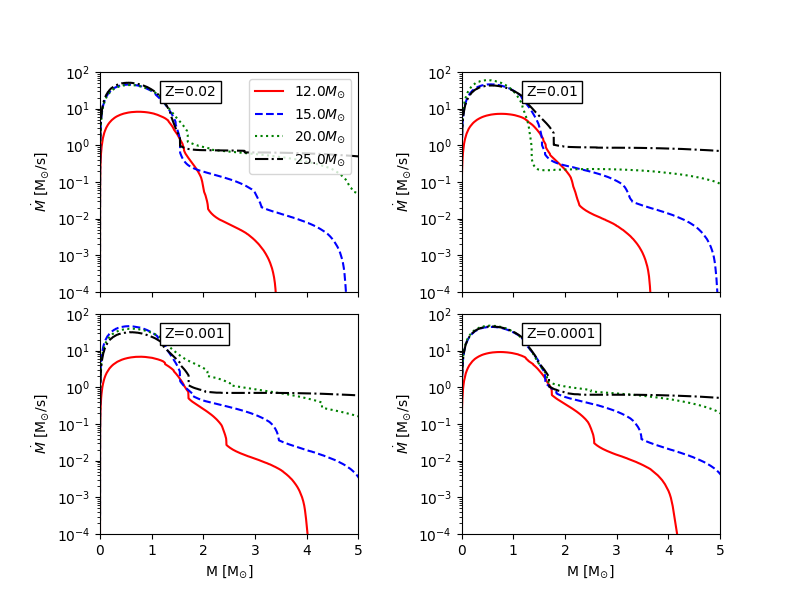

Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
 reading ['mass']...100%cycle lookup 8900
plot
Closing plot_tools
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait

File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
 reading ['mass']...100%0%cycle lookup 11873
plot
Closing plot_tools
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
 reading ['mass']...100%cycle lookup 17170
plot
Closing plot_tools


In [48]:
f, axarr = plt.subplots(2, 2)
for i in range(len(metals)):

        if i==0:
                ax=plt.sca(axarr[0,0])
                axarr[0,0].text(textr, 0.94, metals[i], transform=axarr[0,0].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.2'
                k=0
                for m in [12.,15.,20.,25.]:
                            path_exp1=path_s+'/see_exp/M'+str(m)+'Z2.0e-02.delay'
                            path_wind1=path_s+'/see_wind/M'+str(m)+'Z2.0e-02/M'+str(m)+'Z2.0e-02'
                            label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                            plot_infall_vel(xaxis,axarr[0,0], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                            k=k+1
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                axarr[0,0].set_xlabel('')
                axarr[0,0].set_xticklabels([])
        if i==1:
                ax=plt.sca(axarr[0,1])
                axarr[0,1].text(textr, 0.94, metals[i], transform=axarr[0,1].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.1'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-02.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-02/M'+str(m)+'Z1.0e-02'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[0,1], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)

                axarr[0,1].set_xlabel('')
                axarr[0,1].set_xticklabels([])
                plt.legend().set_visible(False)
        if i==2:
                ax=plt.sca(axarr[1,0])
                axarr[1,0].text(textr, 0.94, metals[i], transform=axarr[1,0].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.4a'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-03.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-03/M'+str(m)+'Z1.0e-03'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[1,0], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                plt.legend().set_visible(False)

        if i==3:
                ax=plt.sca(axarr[1,1])
                axarr[1,1].text(textr, 0.94, metals[i], transform=axarr[1,1].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.5a'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-04.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-04/M'+str(m)+'Z1.0e-04'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[1,1], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                plt.legend().set_visible(False)


f.set_size_inches(8,6,forward=True)
f.subplots_adjust(hspace=0.1,wspace=0.4)
f.savefig('Mdot_mass_collapse.pdf')           

In [49]:
fign = 2
fig=fign
markevery=500
props = dict(boxstyle='square', facecolor='w', alpha=1)
metals=['Z=0.02','Z=0.01','Z=0.001','Z=0.0001']
marker=['o','^','s','D']
marker=['','','','']
shape=['-','--',':','-.']
color=['r','b','g','k']

xaxis='ff'
xmin=1.e-2;xmax=1.e3
ymin=1e-4;ymax=1e2
#xaxis='mass'
#xmin=0.;xmax=5.
props=dict(boxstyle='square',facecolor='w',alpha=1)
path=data_dir+'/data/set1ext'
textr=0.25
log=True
fontsize=10

<IPython.core.display.Javascript object>


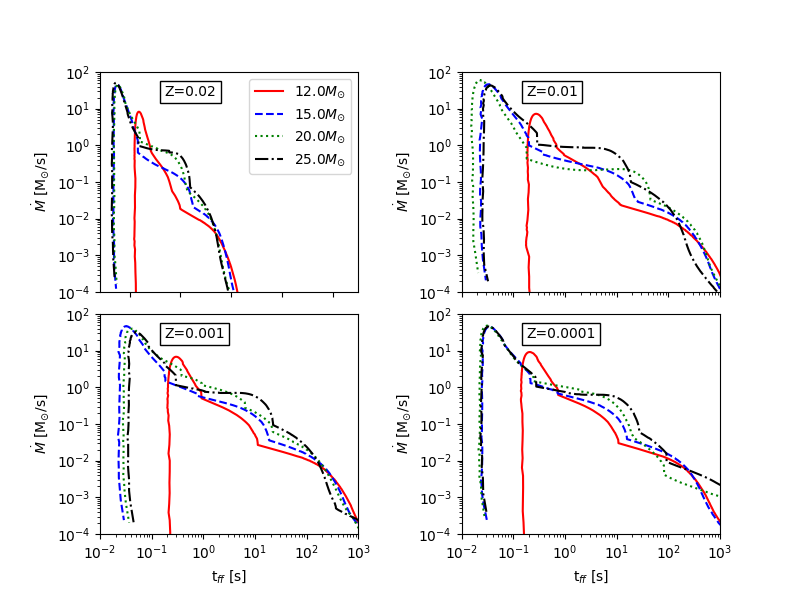

Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.Closing plot_tools

 reading ['mass']...100%cycle lookup 8900
plot
Closing plot_tools
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait

Closing plot_toolsFile search complete.

 reading ['mass']...100%cycle lookup 11873
plot
Closing plot_tools
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
 reading ['mass']...100%cycle lookup 17170
plot
Closing plot_tools


In [50]:
f, axarr = plt.subplots(2, 2)
for i in range(len(metals)):

        if i==0:
                ax=plt.sca(axarr[0,0])
                axarr[0,0].text(textr, 0.94, metals[i], transform=axarr[0,0].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.2'
                k=0
                for m in [12.,15.,20.,25.]:
                            path_exp1=path_s+'/see_exp/M'+str(m)+'Z2.0e-02.delay'
                            path_wind1=path_s+'/see_wind/M'+str(m)+'Z2.0e-02/M'+str(m)+'Z2.0e-02'
                            label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                            plot_infall_vel(xaxis,axarr[0,0], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                            k=k+1
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                #plt.xlim(xmin,xmax)
                axarr[0,0].set_xlabel('')
                axarr[0,0].set_xticklabels([])
        if i==1:
                ax=plt.sca(axarr[0,1])
                axarr[0,1].text(textr, 0.94, metals[i], transform=axarr[0,1].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.1'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-02.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-02/M'+str(m)+'Z1.0e-02'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[0,1], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)

                axarr[0,1].set_xlabel('')
                axarr[0,1].set_xticklabels([])
                plt.legend().set_visible(False)
        if i==2:
                ax=plt.sca(axarr[1,0])
                axarr[1,0].text(textr, 0.94, metals[i], transform=axarr[1,0].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.4a'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-03.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-03/M'+str(m)+'Z1.0e-03'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[1,0], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                plt.legend().set_visible(False)

        if i==3:
                ax=plt.sca(axarr[1,1])
                axarr[1,1].text(textr, 0.94, metals[i], transform=axarr[1,1].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.5a'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-04.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-04/M'+str(m)+'Z1.0e-04'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[1,1], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                plt.legend().set_visible(False)


f.set_size_inches(8,6,forward=True)
f.subplots_adjust(hspace=0.1,wspace=0.4)
f.savefig('Mdot_tff_collapse.pdf')           
                

In [51]:
fign = 3
fig=fign
markevery=500
props = dict(boxstyle='square', facecolor='w', alpha=1)
metals=['Z=0.02','Z=0.01','Z=0.001','Z=0.0001']
marker=['o','^','s','D']
marker=['','','','']
shape=['-','--',':','-.']
color=['r','b','g','k']

##xaxis='ff'
#xmin=0.;xmax=2.
xaxis='mass'
xmin=0.;xmax=5.
ymin=1e-6;ymax=1
props=dict(boxstyle='square',facecolor='w',alpha=1)
path=data_dir+'/data/set1ext'
textr=0.25
log=True
fontsize=10

<IPython.core.display.Javascript object>


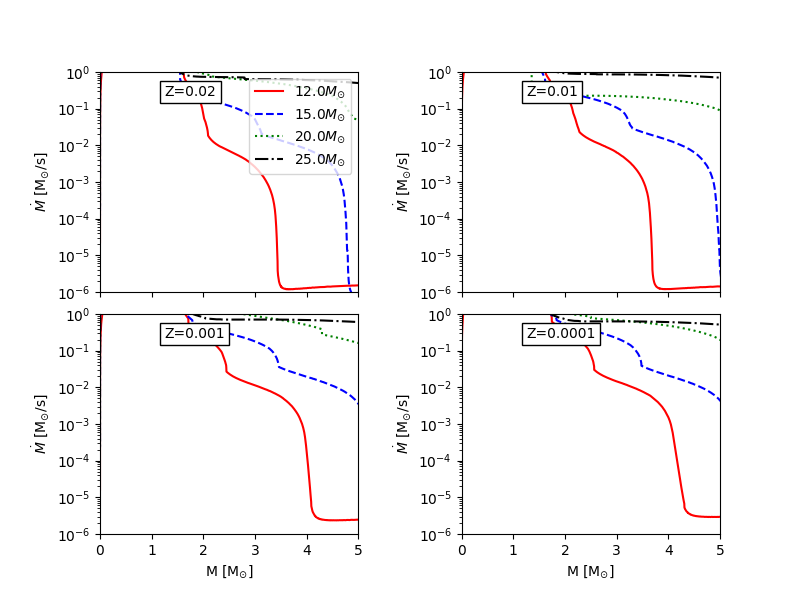

Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
 reading ['mass']...100%cycle lookup 8900
plot
Closing plot_tools
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait

Closing plot_toolsFile search complete.

 reading ['mass']...100%cycle lookup 11873
plot
Closing plot_tools
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Sorry, there is no isomeric state vector. Continue...
This file does not contain any tables.  Isotopic data must be contained elsewhere.
Reading preprocessor files
File search complete.
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
 reading ['mass']...100%cycle lookup 17170
plot
Closing plot_tools


In [52]:
f, axarr = plt.subplots(2, 2)
for i in range(len(metals)):

        if i==0:
                ax=plt.sca(axarr[0,0])
                axarr[0,0].text(textr, 0.94, metals[i], transform=axarr[0,0].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.2'
                k=0
                for m in [12.,15.,20.,25.]:
                            path_exp1=path_s+'/see_exp/M'+str(m)+'Z2.0e-02.delay'
                            path_wind1=path_s+'/see_wind/M'+str(m)+'Z2.0e-02/M'+str(m)+'Z2.0e-02'
                            label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                            plot_infall_vel(xaxis,axarr[0,0], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                            k=k+1
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                axarr[0,0].set_xlabel('')
                axarr[0,0].set_xticklabels([])
        if i==1:
                ax=plt.sca(axarr[0,1])
                axarr[0,1].text(textr, 0.94, metals[i], transform=axarr[0,1].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.1'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-02.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-02/M'+str(m)+'Z1.0e-02'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[0,1], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)

                axarr[0,1].set_xlabel('')
                axarr[0,1].set_xticklabels([])
                plt.legend().set_visible(False)
        if i==2:
                ax=plt.sca(axarr[1,0])
                axarr[1,0].text(textr, 0.94, metals[i], transform=axarr[1,0].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.4a'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-03.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-03/M'+str(m)+'Z1.0e-03'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[1,0], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                plt.legend().set_visible(False)

        if i==3:
                ax=plt.sca(axarr[1,1])
                axarr[1,1].text(textr, 0.94, metals[i], transform=axarr[1,1].transAxes, fontsize=fontsize,verticalalignment='top', bbox=props)
                path_s=path+'/set1.5a'
                k=0
                for m in [12.,15.,20.,25.]:
                        try:
                                path_exp1=path_s+'/see_exp/M'+str(m)+'Z1.0e-04.delay'
                                path_wind1=path_s+'/see_wind/M'+str(m)+'Z1.0e-04/M'+str(m)+'Z1.0e-04'
                                label=str(m)+'$M_{\odot}$' #, Z='+str(metals[i])
                                plot_infall_vel(xaxis,axarr[1,1], path_exp1,path_wind1,label=label,shape=shape[k],marker=marker[k],markevery=markevery,color=color[k])
                                k=k+1
                        except:
                                print('faulty data',label)
                                pass
                plt.legend(loc=1,fontsize=fontsize)
                #axarr[0,0].locator_params(nbins=4, axis='x')
                plt.ylim(ymin,ymax)
                plt.xlim(xmin,xmax)
                plt.legend().set_visible(False)


f.set_size_inches(8,6,forward=True)
f.subplots_adjust(hspace=0.1,wspace=0.4)

                
                

In [53]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')
